In [ ]:
# 1. Import thư viện cần thiết
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [49]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('/content/drive/MyDrive/Dataset/HaNoi.csv')
df.head()

,dateNumber,date,pm25,pm10,o3,no2,so2,co,AQI
0,1,1/1/2014,95,124,22,40,6,28,124
1,2,1/2/2014,186,144,69,39,8,43,186
2,3,1/3/2014,227,151,24,25,12,28,227
3,4,1/4/2014,253,48,13,19,12,14,253
4,5,1/5/2014,95,115,65,35,5,33,115


In [50]:
df1=df.reset_index()['AQI']

In [51]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [52]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]


In [53]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [54]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [55]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [56]:
# 8. Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [57]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
29/29 [==============================] - 4s 80ms/step - loss: 0.0070 - val_loss: 0.0037
Epoch 2/100
29/29 [==============================] - 2s 75ms/step - loss: 0.0042 - val_loss: 0.0029
Epoch 3/100
29/29 [==============================] - 3s 91ms/step - loss: 0.0038 - val_loss: 0.0026
Epoch 4/100
29/29 [==============================] - 2s 74ms/step - loss: 0.0037 - val_loss: 0.0025
Epoch 5/100
29/29 [==============================] - 2s 56ms/step - loss: 0.0036 - val_loss: 0.0024
Epoch 6/100
29/29 [==============================] - 2s 56ms/step - loss: 0.0035 - val_loss: 0.0023
Epoch 7/100
29/29 [==============================] - 2s 55ms/step - loss: 0.0034 - val_loss: 0.0022
Epoch 8/100
29/29 [==============================] - 2s 55ms/step - loss: 0.0034 - val_loss: 0.0023
Epoch 9/100
29/29 [==============================] - 2s 55ms/step - loss: 0.0033 - val_loss: 0.0021
Epoch 10/100
29/29 [==============================] - 2s 69ms/step - loss: 0.0033 - val_loss: 0.0020

In [58]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

6/6 [==============================] - 0s 12ms/step


In [59]:
# 11. Chuẩn hóa dữ liệu y_pred
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [60]:

test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 74.64206906946842


In [61]:
import numpy as np
from numpy import array

# Assuming val_data is your initial data array and model is your trained model

# Set the number of time steps to use for each prediction
n_steps = 100

# Initialize the input data
x_input = val_data[60:].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# List to store the predictions
lst_output = []

# Number of days to predict
n_days = 30

# Loop to generate predictions for the next n_days
for i in range(n_days):
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:])  # Use the last n_steps elements
        x_input = x_input.reshape((1, n_steps, 1))  # Reshape to (1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])  # Append the prediction to the input list
        lst_output.append(yhat[0][0])  # Store the prediction in the output list
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])  # Append the prediction to the input list
        lst_output.append(yhat[0][0])  # Store the prediction in the output list

# Print the predictions
print(lst_output)


[0.14480123, 0.15424237, 0.15914299, 0.16224685, 0.16448463, 0.16617665, 0.16746886, 0.1684598, 0.16922803, 0.16983704, 0.17033538, 0.17075865, 0.17113236, 0.17147388, 0.1717949, 0.17210318, 0.17240341, 0.17269804, 0.17298834, 0.17327495, 0.17355835, 0.17383838, 0.1741149, 0.17438771, 0.17465632, 0.1749205, 0.1751803, 0.17543554, 0.17568623, 0.17593227]


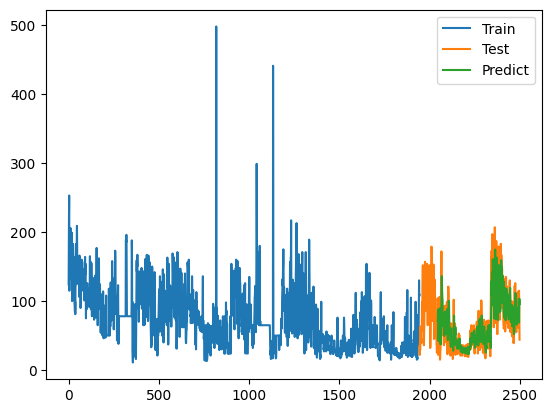

In [68]:
# 14.Vẽ hình
lst_output_2d = np.array(lst_output).reshape(-1, 1)

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.legend(['Train','Test','Predict'])
plt.show()